In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv("C:/Users/User/Desktop/Joined-Tables.csv")
df.head()

,CustomerID,Name,Gender,Age,Region,PlanType,SignupDate,AvgDataGB,AvgMinutes,AvgSMS,AvgAmountCharged,UnpaidCount,Churned,ChurnDate,TotalTickets
0,C0001,Customer_1,M,49,Kisumu,Family,2023-12-15,2.02,1266.00,139.50,29.49,24,0,-,2
1,C0002,Customer_2,F,56,Eldoret,Prepaid,2023-04-03,8.71,543.83,77.67,34.41,12,0,-,1
2,C0003,Customer_3,M,49,Nairobi,Prepaid,2022-03-24,4.99,725.17,68.50,28.61,24,0,-,2
3,C0004,Customer_4,M,21,Eldoret,Prepaid,2022-05-25,2.06,696.17,101.17,23.10,0,0,-,2
4,C0005,Customer_5,M,47,Nakuru,Family,2022-03-26,4.46,1219.83,107.00,33.26,0,0,-,1


In [4]:
# Defining billing default as UnpaidCount > 0
df['BillingDefault'] = df['UnpaidCount'].apply(lambda x: 1 if x > 0 else 0)

In [5]:
df.drop(['CustomerID', 'Name', 'SignupDate', 'ChurnDate', 'Churned'], axis=1, inplace=True)

In [6]:
categorical_cols = ['Gender', 'Region', 'PlanType']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [7]:
X = df.drop('BillingDefault', axis=1)
y = df['BillingDefault']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



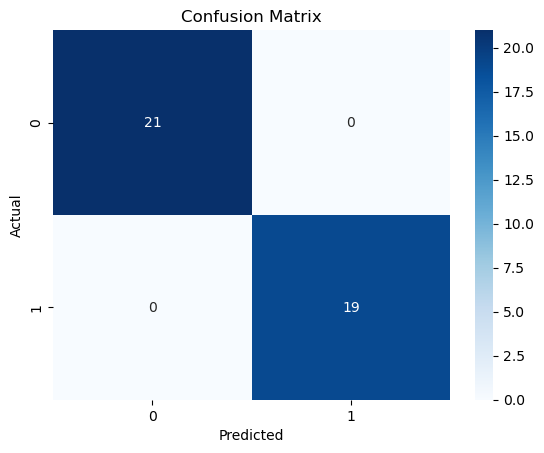

In [11]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

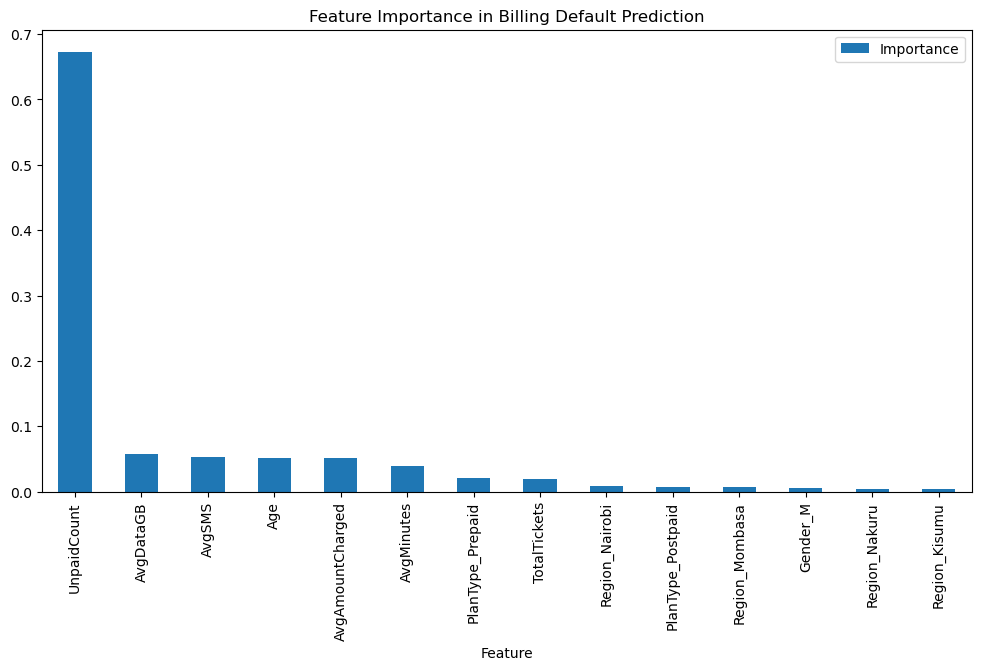

In [12]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values('Importance', ascending=False).plot.bar(x='Feature', figsize=(12,6))
plt.title("Feature Importance in Billing Default Prediction")
plt.show()